In [1]:
import numpy as np
from physicsinformed_project2 import PhysicsInformedBarModel
import torch
import matplotlib.pyplot as plt
import utilities
import math

In [2]:
samples = 50

In [3]:
E =  1.44*(10**9)
nu = 0.38
P = 100*(10**-6)
l = 11.01*(10**-6)
L,b,h = 40*l,4*l,2*l
I = (b*(h**3))/12
mu = (E/(1+nu))*0.5
A = b*h
D1 = E*I
D2 = 0
arr = np.zeros(50)
arr[-1]= P
distLoad = lambda x: P*x
u0 = [0,0,0,0,0,0]
# print(D1,D2)
# print(math.sqrt(D2/D1))
# print((D2 ** 2)/ (D1 ** 3))

In [4]:
pinnModel = PhysicsInformedBarModel(D1, D2, L, u0, dist_load = distLoad)

check 5
check 5
check 5
check 5


In [5]:
for i in range(1):
    epochs = 1000
    learningRate = 1e-2
    print(i+1)
    pinnModel.train(epochs, optimizer='Adam', lr=learningRate)

1
Epoch: 0/999		Differential equation loss = 1.794e+04		Boundary condition loss = 1.158e+05		Total loss = 1.338e+05
Epoch: 100/999		Differential equation loss = 2.964e+02		Boundary condition loss = 5.247e+02		Total loss = 8.211e+02
Epoch: 200/999		Differential equation loss = 1.957e+02		Boundary condition loss = 3.766e+01		Total loss = 2.334e+02
Epoch: 300/999		Differential equation loss = 1.681e+02		Boundary condition loss = 1.599e+00		Total loss = 1.697e+02
Epoch: 400/999		Differential equation loss = 1.378e+02		Boundary condition loss = 4.500e-01		Total loss = 1.383e+02
Epoch: 500/999		Differential equation loss = 1.097e+02		Boundary condition loss = 4.246e-01		Total loss = 1.101e+02
Epoch: 600/999		Differential equation loss = 8.513e+01		Boundary condition loss = 3.676e-01		Total loss = 8.549e+01
Epoch: 700/999		Differential equation loss = 6.459e+01		Boundary condition loss = 2.810e-01		Total loss = 6.488e+01
Epoch: 800/999		Differential equation loss = 4.798e+01		Boundary conditi

In [20]:
x_test = utilities.generate_grid_1d(40*l, samples)
u_test = pinnModel.get_displacements(x_test)
yy = P*(L**3)/(3*E*I)
print(yy)

u_analytic = lambda x: yy*(1.5*((x/L)**2)-(0.5*((x/L)**3))) #classical solution

print(x_test[0],u_test[0],u_test[-1],u_analytic(L))

5.045917852457362e-05
tensor([0.], grad_fn=<SelectBackward0>) tensor([4.2468e-06], grad_fn=<SelectBackward0>) tensor([4.2766e-06], grad_fn=<SelectBackward0>) 5.045917852457362e-05


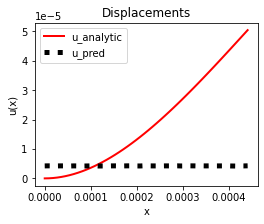

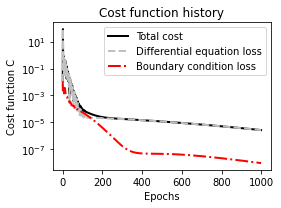

In [21]:
utilities.plot_displacements_bar(x_test, u_test, u_analytic)

pinnModel.plot_training_history()